In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "salary_.csv"
encoding = "CP1251"
delimiter = ";"
df = pd.read_csv(file_path, encoding=encoding, delimiter=delimiter)

In [2]:
from pandas import DataFrame


def get_external(x: DataFrame):
    return (
        x["Оклад (ставка) по основному месту работы"].isna().all()
        and x["Оклад (ставка) на работе по совместительству"].notna().any()
    )


def get_internal(x: DataFrame):
    return x["Оклад (ставка) по основному месту работы"].notna().any()

In [3]:
empployees = df.dropna(
    subset=[
        "Оклад (ставка) по основному месту работы",
        "Оклад (ставка) на работе по совместительству",
    ],
    how="all",
)

In [4]:
r1a = df["Всего. руб."].sum()
r1b = df.groupby("Должность")["Всего. руб."].sum().reset_index().values.tolist()
r1d = empployees.groupby("Т/Н").filter(get_external)["Всего. руб."].sum()
r1c = r1a - r1d

empployees.groupby("Т/Н").filter(get_external).reset_index()

,index,Т/Н,Должность,Ставка,Код подразд.,Оклад (ставка) по основному месту работы,Оклад (ставка) на работе по совместительству,Всего. руб.
0,2,302429,Доцент,0.05,17052.0,NaN,491.50,1435.72
1,3,302429,Доцент,0.45,17054.0,NaN,4423.50,12923.00
2,16,2107,Профессор,0.50,171004.0,NaN,5230.50,23318.95
3,20,1858,Профессор,0.50,170601.0,NaN,4915.00,8847.00
4,27,302807,Профессор,0.25,171002.0,NaN,2615.25,11808.34
...,...,...,...,...,...,...,...,...
147,749,166520,Старший преподаватель,0.50,17045.0,NaN,4311.50,5389.38
148,750,302493,Ассистент,0.30,NaN,NaN,2405.70,2405.70
149,783,303467,Преподаватель,0.50,170602.0,NaN,4009.50,15206.45
150,791,302264,Ассистент,0.50,17091.0,NaN,4009.50,4009.50


In [5]:
r1 = [r1a, r1b, r1c, r1d]
r1

[12018196.17,
 [['Ассистент', 878028.88],
  ['Доцент', 6227156.38],
  ['Преподаватель', 564664.9],
  ['Профессор', 1540199.77],
  ['Старший преподаватель', 2808146.24]],
 10459905.26,
 1558290.9100000001]

In [6]:
unique_df = empployees.drop_duplicates(subset=["Т/Н", "Должность"])

r2 = unique_df["Должность"].value_counts().reset_index()
r2.columns = ["Должность", "Количество"]

r2

,Должность,Количество
0,Доцент,300
1,Старший преподаватель,216
2,Ассистент,100
3,Профессор,71
4,Преподаватель,51


In [7]:
assistant_df = empployees[empployees["Должность"] == "Ассистент"]

total_salary_by_employee = (
    assistant_df.groupby("Т/Н")["Всего. руб."].sum().reset_index()
)

r3a = total_salary_by_employee["Всего. руб."].min()

r3b = total_salary_by_employee["Всего. руб."].mean()

r3c = total_salary_by_employee["Всего. руб."].max()

r3 = [r3a, r3b, r3c]
r3

[805.5, 8776.9448, 21484.59]

In [8]:
associate_external_df = empployees[empployees["Должность"] == "Доцент"]

filtered_associate_external_df = associate_external_df.groupby("Т/Н").filter( get_external)

grouped_df = (
    filtered_associate_external_df.groupby("Т/Н")
    .agg({"Ставка": "sum", "Оклад (ставка) на работе по совместительству": "sum"})
    .reset_index()
)

r4a = grouped_df[["Т/Н", "Ставка", "Оклад (ставка) на работе по совместительству"]]

r4b = len(grouped_df)

r4 = [r4a, r4b]

r4

[       Т/Н  Ставка  Оклад (ставка) на работе по совместительству
 0     1341    0.25                                       2457.50
 1     1469    0.50                                       4915.00
 2     2397    0.50                                       4915.00
 3     2652    0.50                                       4915.00
 4     2797    0.50                                       4915.00
 5     4232    0.50                                       4656.32
 6     4420    0.50                                       4009.50
 7     5196    0.30                                       2949.00
 8     5601    0.25                                       2457.50
 9     5721    0.38                                       3342.20
 10    9709    0.50                                       4915.00
 11    9931    0.25                                       2457.50
 12   70184    0.50                                       3621.58
 13   74235    0.50                                       4915.00
 14  10078

In [9]:
filtered_main_job_df = empployees.groupby("Т/Н").filter(get_internal)

grouped_df = filtered_main_job_df.groupby("Т/Н")["Всего. руб."].sum().reset_index()

r5a = grouped_df["Всего. руб."].min()

r5b = grouped_df["Всего. руб."].mean()

r5c = grouped_df["Всего. руб."].max()

r5 = [r5a, r5b, r5c]

r5

[805.5, 17596.471313131315, 55773.53]

In [10]:
filtered_main_job_df = empployees.groupby("Т/Н").filter(get_external)

grouped_df = filtered_main_job_df.groupby("Т/Н")["Ставка"].sum().reset_index()

r6a = grouped_df["Ставка"].min()

r6b = grouped_df["Ставка"].mean()

r6c = grouped_df["Ставка"].max()

r6 = [r6a, r6b, r6c]

r6

[0.05, 0.39070422535211263, 0.5]

In [11]:
associate_df = empployees[empployees["Должность"] == "Доцент"]

r7 = associate_df.groupby("Т/Н").agg({"Ставка": "sum"})
r7 = r7[r7["Ставка"] == 1]
r7.reset_index()

,Т/Н,Ставка
0,114,1.0
1,540,1.0
2,585,1.0
3,1204,1.0
4,1504,1.0
5,1616,1.0
6,1651,1.0
7,2263,1.0
8,2293,1.0
9,2328,1.0


In [12]:
filtered_main_job_df = empployees.groupby("Т/Н").filter(get_internal)
grouped_df = filtered_main_job_df.groupby("Т/Н")["Ставка"].sum().reset_index()

r8 = grouped_df.nsmallest(1, "Ставка").reset_index()[["Т/Н", "Ставка"]]
r8

,Т/Н,Ставка
0,303612,0.05


In [13]:
total_organization_df = (
    df.groupby("Т/Н")
    .agg({"Всего. руб.": "sum"})
    .sort_values("Всего. руб.")
    .reset_index()["Всего. руб."]
)

filtered_main_job_df = empployees.groupby("Т/Н").filter(get_internal)

filtered_external_df = empployees.groupby("Т/Н").filter(get_external)

internal_employees_df = (
    filtered_main_job_df.groupby("Т/Н")
    .agg({"Всего. руб.": "sum"})
    .sort_values("Всего. руб.")
    .reset_index()["Всего. руб."]
)

external_employees_df = (
    filtered_external_df.groupby("Т/Н")
    .agg({"Всего. руб.": "sum"})
    .sort_values("Всего. руб.")
    .reset_index()["Всего. руб."]
)

In [14]:
r = [r1, r2, r3, r4, r5, r6, r7, r8]
r

[[12018196.17,
  [['Ассистент', 878028.88],
   ['Доцент', 6227156.38],
   ['Преподаватель', 564664.9],
   ['Профессор', 1540199.77],
   ['Старший преподаватель', 2808146.24]],
  10459905.26,
  1558290.9100000001],
                Должность  Количество
 0                 Доцент         300
 1  Старший преподаватель         216
 2              Ассистент         100
 3              Профессор          71
 4          Преподаватель          51,
 [805.5, 8776.9448, 21484.59],
 [       Т/Н  Ставка  Оклад (ставка) на работе по совместительству
  0     1341    0.25                                       2457.50
  1     1469    0.50                                       4915.00
  2     2397    0.50                                       4915.00
  3     2652    0.50                                       4915.00
  4     2797    0.50                                       4915.00
  5     4232    0.50                                       4656.32
  6     4420    0.50                                     

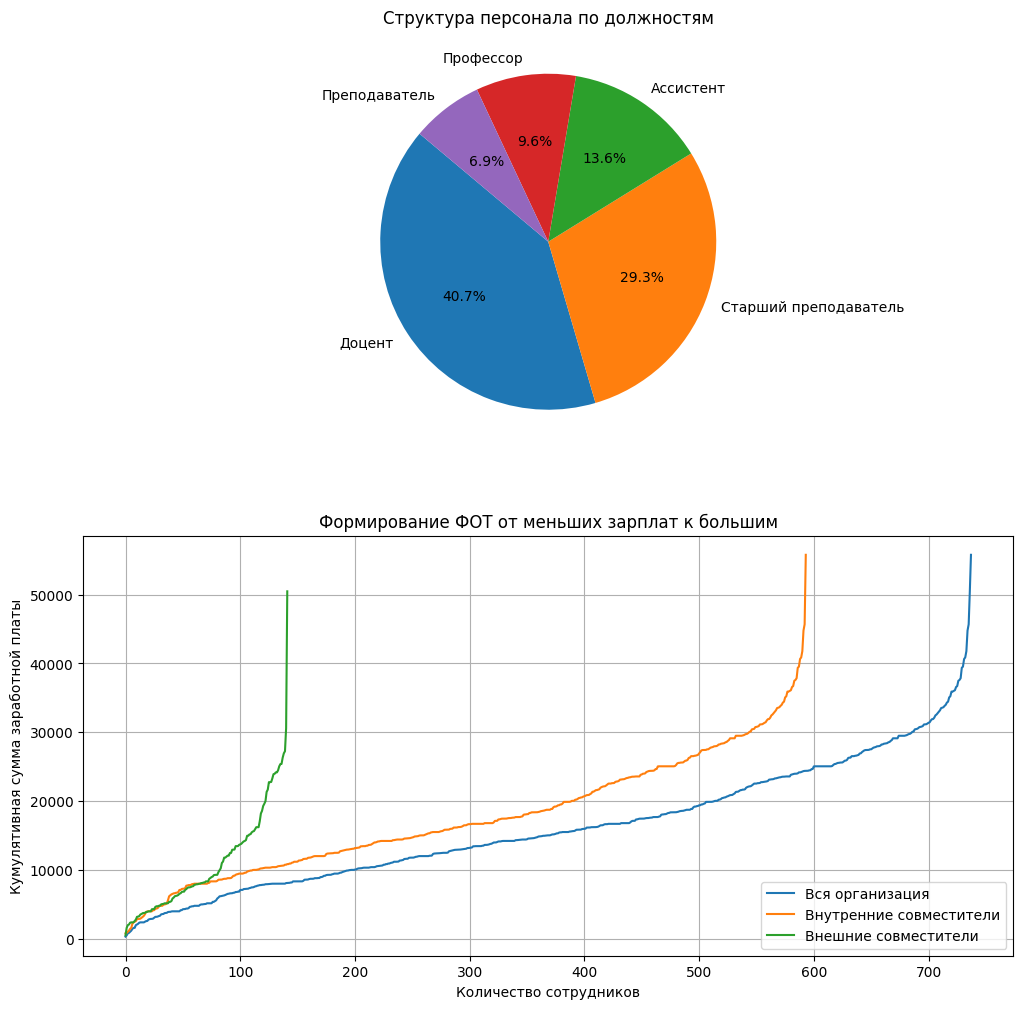

In [15]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.pie(r2["Количество"], labels=r2["Должность"], autopct="%1.1f%%", startangle=140)
plt.title("Структура персонала по должностям")

plt.subplot(2, 1, 2)
plt.plot(total_organization_df, label="Вся организация")
plt.plot(internal_employees_df, label="Внутренние совместители")
plt.plot(external_employees_df, label="Внешние совместители")
plt.title("Формирование ФОТ от меньших зарплат к большим")
plt.xlabel("Количество сотрудников")
plt.ylabel("Кумулятивная сумма заработной платы")
plt.legend()
plt.grid(True)